In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [45]:
df = pd.read_csv('../Data/Mall_Customers.csv')

In [46]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [48]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [49]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [51]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

In [53]:
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [54]:
kmeans_predictions = kmeans.predict(X)

In [56]:
sil_score = silhouette_score(X, kmeans_predictions)
sil_score

np.float64(0.4937945814354117)

## Memilih k terbaik
1. Coba coba (bruteforce)
2. Elbow Method

In [57]:
from sklearn.metrics import silhouette_score

best_score = -1
best_k = 0
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Cluster {k} = Silhouette Score = {score:.4f}")

    if score > best_score:
        best_score = score
        best_k = k

print(f"\nJumlah cluster terbaik: {best_k} dengan Silhouette Score = {best_score:.4f}")

Cluster 2 = Silhouette Score = 0.3956
Cluster 3 = Silhouette Score = 0.4676
Cluster 4 = Silhouette Score = 0.4938
Cluster 5 = Silhouette Score = 0.5539
Cluster 6 = Silhouette Score = 0.5128
Cluster 7 = Silhouette Score = 0.5017
Cluster 8 = Silhouette Score = 0.4963
Cluster 9 = Silhouette Score = 0.4559
Cluster 10 = Silhouette Score = 0.4426

Jumlah cluster terbaik: 5 dengan Silhouette Score = 0.5539


In [58]:
elbow_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    elbow_scores.append(kmeans.inertia_)

In [59]:
elbow_scores

[269981.27999999997,
 183653.32894736843,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 40825.16946386946,
 33642.57922077922,
 26686.837785187785,
 24766.47160979344,
 23103.12208598392]

In [60]:
import seaborn as sns

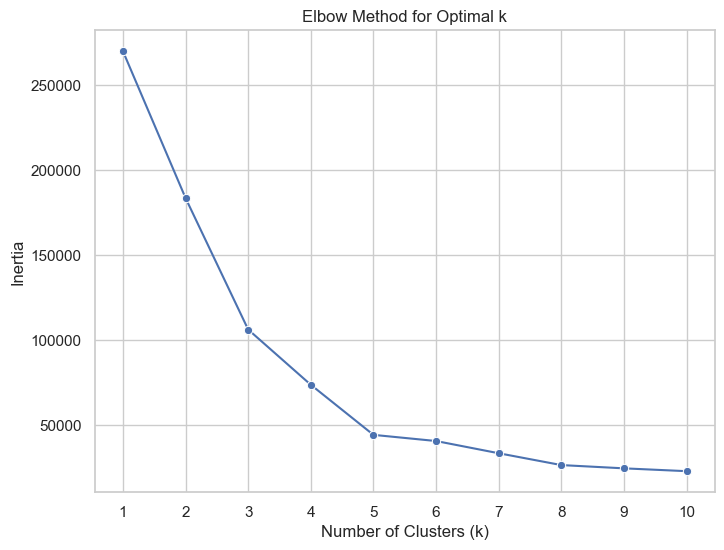

In [62]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, 11), y=elbow_scores, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.xticks(range(1, 11))
plt.ylabel('Inertia')
plt.show()

In [63]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

In [64]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [65]:
clust_predictions = kmeans.predict(X)

In [66]:
sil_score = silhouette_score(X, clust_predictions)

In [67]:
sil_score

np.float64(0.553931997444648)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

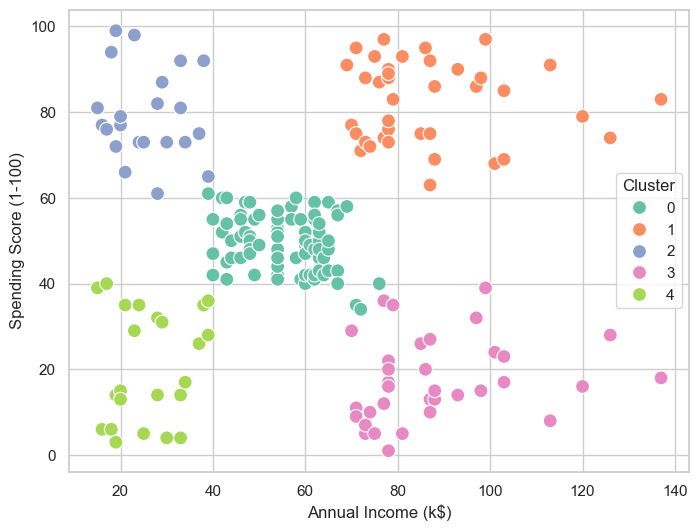

In [68]:
df_plot = pd.DataFrame(X, columns=["Annual Income (k$)", "Spending Score (1-100)"])
df_plot["Cluster"] = clust_predictions

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set2",
    s=100
)

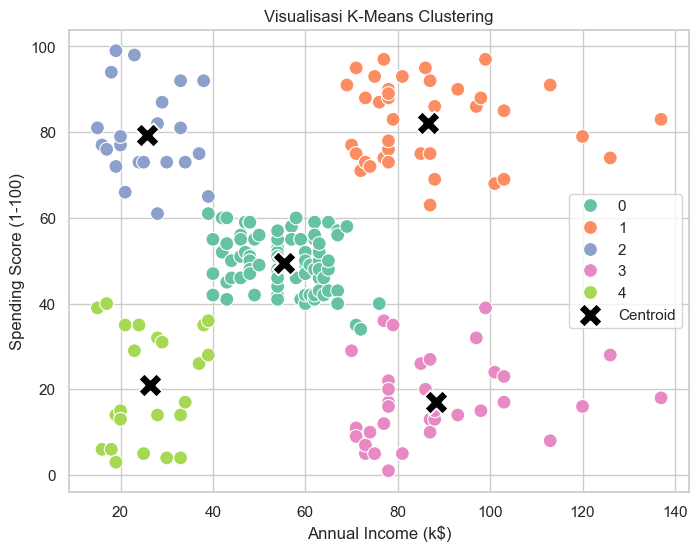

In [69]:
df_plot = pd.DataFrame(X, columns=["Annual Income (k$)", "Spending Score (1-100)"])
df_plot["Cluster"] = clust_predictions

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set2",
    s=100
)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=["Annual Income (k$)", "Spending Score (1-100)"])
sns.scatterplot(
    data=centers,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    s=300,
    color="black",
    marker="X",
    label="Centroid"
)

plt.title("Visualisasi K-Means Clustering")
plt.legend()
plt.show()

In [3]:
df = pd.read_csv('../Data/Mall_Customers.csv')

In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
optimal_k = 4
kmeans_model = KMeans(
    n_clusters=optimal_k, 
    init='k-means++',
    random_state=42
)

In [14]:
predicted_clusters = kmeans_model.fit_predict(X)

In [15]:
average_score = silhouette_score(X, predicted_clusters)
print(f"Rata-rata Silhouette Score untuk K={optimal_k} adalah: {average_score:.4f}")

Rata-rata Silhouette Score untuk K=4 adalah: 0.4932


### Best model manual

In [ ]:
from sklearn.metrics import silhouette_score

best_score = -1
best_k = 0
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Cluster {k} = Silhouette Score = {score:.4f}")

    if score > best_score:
        best_score = score
        best_k = k

print(f"\nJumlah cluster terbaik: {best_k} dengan Silhouette Score = {best_score:.4f}")

Cluster 2 = Silhouette Score = 0.3956
Cluster 3 = Silhouette Score = 0.4676
Cluster 4 = Silhouette Score = 0.4938
Cluster 5 = Silhouette Score = 0.5539
Cluster 6 = Silhouette Score = 0.5128
Cluster 7 = Silhouette Score = 0.5017
Cluster 8 = Silhouette Score = 0.4963
Cluster 9 = Silhouette Score = 0.4559
Cluster 10 = Silhouette Score = 0.4426

Jumlah cluster terbaik: 5 dengan Silhouette Score = 0.5539


In [17]:
wcss = []  # Elbow
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [18]:
import seaborn as sns

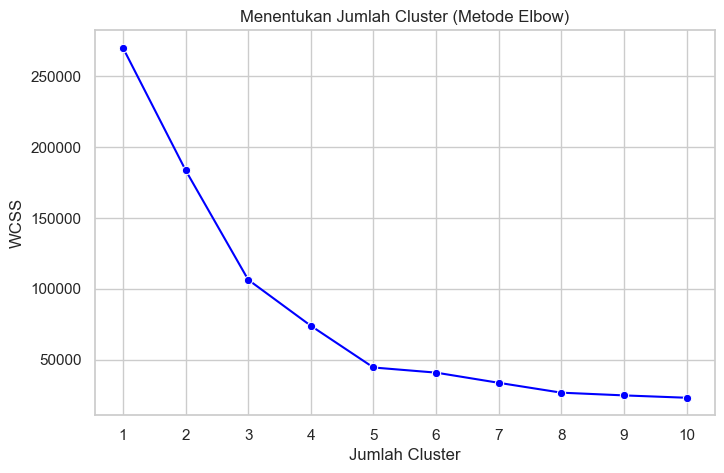

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker="o", color="blue")
plt.title("Menentukan Jumlah Cluster (Metode Elbow)")
plt.xlabel("Jumlah Cluster")
plt.xticks(range(1, 11))
plt.ylabel("WCSS")
plt.show()

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42) 
y_kmeans = kmeans.fit_predict(X)

In [23]:
sil_score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {sil_score:.4f} (Semakin mendekati 1 semakin baik)")

Silhouette Score: 0.5539 (Semakin mendekati 1 semakin baik)


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

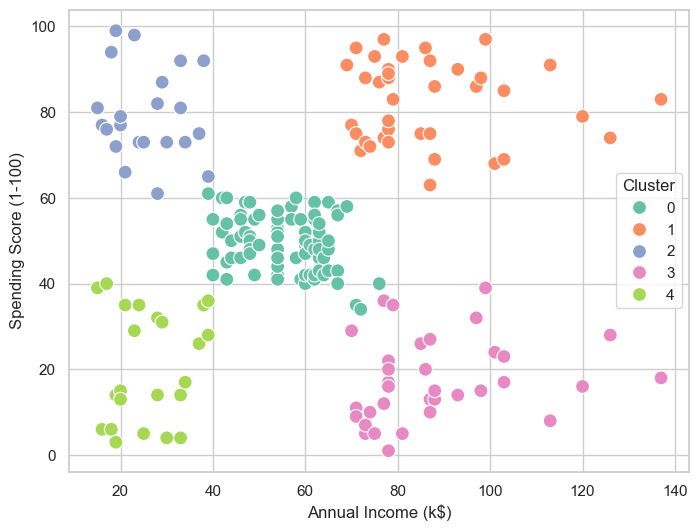

In [25]:
df_plot = pd.DataFrame(X, columns=["Annual Income (k$)", "Spending Score (1-100)"])
df_plot["Cluster"] = y_kmeans

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set2",
    s=100
)

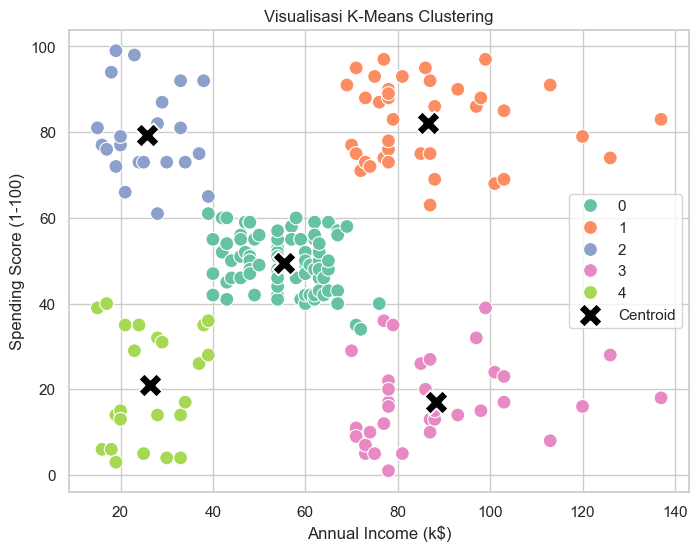

In [27]:
df_plot = pd.DataFrame(X, columns=["Annual Income (k$)", "Spending Score (1-100)"])
df_plot["Cluster"] = y_kmeans

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set2",
    s=100
)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=["Annual Income (k$)", "Spending Score (1-100)"])
sns.scatterplot(
    data=centers,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    s=300,
    color="black",
    marker="X",
    label="Centroid"
)

plt.title("Visualisasi K-Means Clustering")
plt.legend()
plt.show()

In [28]:
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [32]:
X_oh = pd.get_dummies(X, columns=['Gender'], drop_first=True)

In [33]:
kmeans = KMeans(n_clusters=4, init='random', random_state=42)

In [35]:
kmeans.fit(X_oh)

KMeans(init='random', n_clusters=4, random_state=42)

In [36]:
predicted_clusters = kmeans.predict(X_oh)

In [37]:
sil_score = silhouette_score(X_oh, predicted_clusters)

In [38]:
sil_score

np.float64(0.4052954330641215)